# Wenfei Huang

## CIS 9655 Data Visualization

In [2]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
plt.rc('figure', figsize=(10,6))

%matplotlib inline

In [3]:
data_url = 'http://bit.ly/2cLzoxH'
df = pd.read_csv(data_url, index_col= 0)

df.head()

,year,pop,continent,lifeExp,gdpPercap
country,,,,,
Afghanistan,1952,8425333.0,Asia,28.801,779.445314
Afghanistan,1957,9240934.0,Asia,30.332,820.853030
Afghanistan,1962,10267083.0,Asia,31.997,853.100710
Afghanistan,1967,11537966.0,Asia,34.020,836.197138
Afghanistan,1972,13079460.0,Asia,36.088,739.981106



 
        This dataset contains over 140 countries' general development records, including population, life expectancy, GDP per capita. We see how those factors interplay one another by dragging some graphs.

** **

**Line Chart**

In [4]:
gdp2007 = df[df['year'] == 2007]['gdpPercap']
life2007 = df[df['year'] == 2007]['lifeExp']

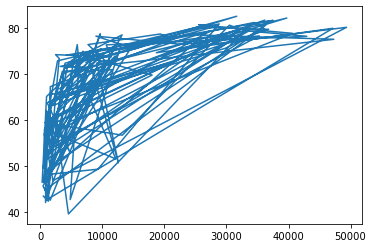

In [5]:
plt.plot(gdp2007, life2007)

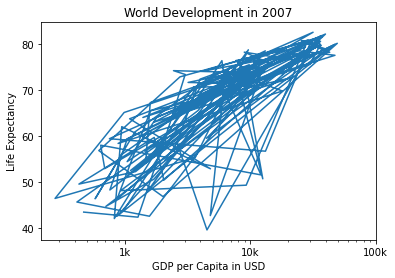

In [6]:
plt.plot(gdp2007, life2007)

plt.xscale('log')
plt.xlabel('GDP per Capita in USD')
plt.ylabel('Life Expectancy')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

plt.title('World Development in 2007')

plt.show()


        The first line chart is not scaled with 'log', that's why we don't see a clear upward trend. After changing to the exponential scale, the upward trend is more visible. Life expectancy is positively affected by economic production. The higher the GDP per capita the longer the lifespan. In the other world, people live longer in countries with higher GDP per capita. Since there are too many countries in this dataset, the line is twisted and entangled making the graph not concise and straightforward.

** **

**Pie Chart**

In [7]:
cont = ['Asia', 'Europe','Africa','Americas','Oceania']
colors = ['red', 'green', 'blue', 'yellow', 'black']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

In [8]:
pop_per_cont = [3811953827, 586098529, 929539692, 898871184, 24549947]

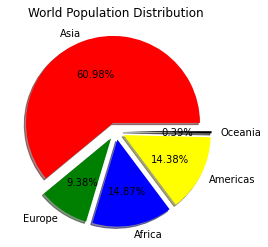

In [9]:
plt.pie(pop_per_cont, colors = colors, labels = cont, 
        explode = explode, shadow = True, autopct='%1.2f%%')

plt.title('World Population Distribution')

plt.show()



       The pie chart illustrates the world population distribution as a percentage. Asia contributes 60.98% of the world population since it has The two most populous countries - India and China. The color attached to each continent will be consistent with the following charts.

** **

**Bar Chart**

In [10]:
life_vs_gdp= df[df['year'].isin(range(1967,2007+1))]

life_vs_gdp= life_vs_gdp.sort_values(by=['year'])[['lifeExp','year']]
                
life_vs_gdp.head()


,lifeExp,year
country,,
Afghanistan,34.020,1967
Ecuador,56.678,1967
Somalia,38.977,1967
Egypt,49.293,1967
Trinidad and Tobago,65.400,1967


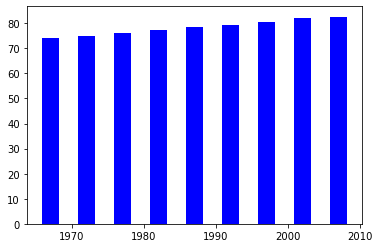

In [11]:
plt.bar(life_vs_gdp['year'], life_vs_gdp['lifeExp'], color = 'b', width = 2.3, align='center')

#plt.bar(life_vs_gdp['year'], life_vs_gdp['gdpPercap'], color = 'b', width = 1, align='center')

plt.show()


        The bar chart shows that life expectancy grows steadily over the past four decades. People live about seven to eight years longer compared to 1967.

** **

**Histogram**

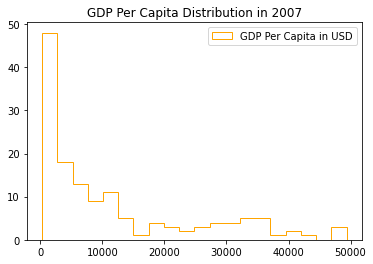

In [12]:
plt.hist(df[df['year'] == 2007]['gdpPercap'], 20, histtype='step',color='orange', 
         align = 'mid', label= 'GDP Per Capita in USD')

plt.title('GDP Per Capita Distribution in 2007')
plt.legend()

plt.show()

        This histogram reveals that the GDP per capita in 2007 is a right-skewed distribution. It means that most of the people around the world earn below $15,000 in 2007, compared to the world poverty line $12,760.

** **

**Scatterplot**

In [13]:
df2007 = df[df.year.isin([2007])]

df2007.head()

,year,pop,continent,lifeExp,gdpPercap
country,,,,,
Afghanistan,2007,31889923.0,Asia,43.828,974.580338
Albania,2007,3600523.0,Europe,76.423,5937.029526
Algeria,2007,33333216.0,Africa,72.301,6223.367465
Angola,2007,12420476.0,Africa,42.731,4797.231267
Argentina,2007,40301927.0,Americas,75.320,12779.379640


In [14]:
cont2007=df2007['continent']

print(cont2007)

country
Afghanistan               Asia
Albania                 Europe
Algeria                 Africa
Angola                  Africa
Argentina             Americas
                        ...   
Vietnam                   Asia
West Bank and Gaza        Asia
Yemen Rep.                Asia
Zambia                  Africa
Zimbabwe                Africa
Name: continent, Length: 142, dtype: object


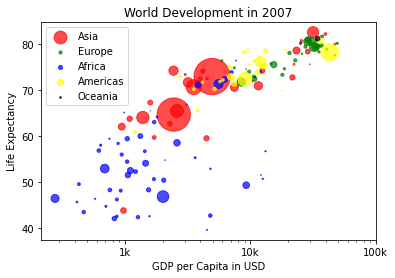

In [15]:
color_list = {'Asia':'red', 'Europe':'green', 'Africa':'blue',
              'Americas':'yellow', 'Oceania': 'black'}

pop = df2007[['pop', 'continent']]
groups = df2007.groupby('continent')

for continent in color_list.keys():
    x = df2007[df2007['continent'] == continent]['gdpPercap']
    y = df2007[df2007['continent'] == continent]['lifeExp']
    continent_pop = pop[pop['continent'] == continent]['pop']*0.000001
    plt.scatter(x, y, s = continent_pop, alpha = 0.7, color=color_list[continent], label=continent)

plt.xscale('log')
plt.xlabel('GDP per Capita in USD')
plt.ylabel('Life Expectancy')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

plt.title('World Development in 2007')

plt.legend(markerscale=0.5)

plt.show()

        The scatterplot is depicted by the continental segmentation, the same as the pie chart. Americas and Europe occupy most of the right upper quadrant, which means that these two continents have high economic production and life expectancy. This scatterplot tells that GDP per capita and life expectancy are positively related. Compared to the line chart, the scatterplot provides a better picture of the relationship between those two factors.

**  **

**Subplot**

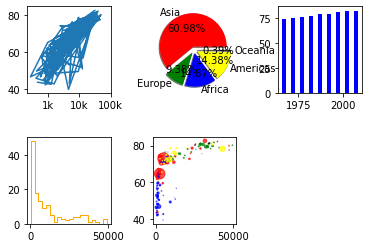

In [16]:

fig, axes = plt.subplots(2,3)

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

axes[0,0].plot(gdp2007, life2007)
axes[0,1].pie(pop_per_cont, colors = colors, labels = cont, 
        explode = explode, shadow = True, autopct='%1.2f%%',)
axes[0,2].bar(life_vs_gdp['year'], life_vs_gdp['lifeExp'], color = 'b', width = 2.2, align='center')
axes[1,0].hist(df[df['year'] == 2007]['gdpPercap'], 20, histtype='step',color='orange', 
         align = 'mid', label= 'GDP Per Capita in USD')
for continent in color_list.keys():
    x = df2007[df2007['continent'] == continent]['gdpPercap']
    y = df2007[df2007['continent'] == continent]['lifeExp']
    continent_pop = pop[pop['continent'] == continent]['pop']*0.0000001
    axes[1,1].scatter(x, y, s = continent_pop, alpha = 0.7, color=color_list[continent], label=continent)

axes[1,2].axis('off')

plt.sca(axes[0, 0])
plt.xscale('log')
plt.xticks([1000,10000,100000], ['1k','10k','100k'])

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

        In short, life expectancy is positively related to economic production. Americas and Europe are at the leading position of GDP per capita and life expectancy, which is critical to people's general well-being. However, there are more than half of the people around the world are still struggling on the world poverty line or even below it.